<a href="https://colab.research.google.com/github/mateosuster/nlpPapers/blob/main/10_LDA_TopicModels_GENSIM_EVOLUCION_ANUAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencias

In [ ]:
%%capture
!pip install pyLDAvis==2.1.2

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from collections import Counter


from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim import corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

# **LDA: MODEL 1:** ***19 Topics***

In [ ]:
### LDA TOPICS:
# params
Tipo_Datos_ = "sampleados"  ### INGRESE DATOS A UTILIZAR: ELIJA: "totales" O "sampleados".
Cant_Optima_Topics = 19     ### INGRESE CANT. OPTIMA DE TOPICOS. 

# data
from pandas.core.describe import describe_categorical_1d
data_Total = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/ACL_data.csv")
data_Sampleada = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/data_clean.csv")

if Tipo_Datos_ == "sampleados":
  data = data_Sampleada
elif Tipo_Datos_ == "totales":
  data = data_Total

if Tipo_Datos_ == "sampleados":
  dataset = data.text.tolist()
elif Tipo_Datos_ == "totales":
  dataset = data.ABSTRACT
  dataset = dataset.tolist()

#cleaning
STOP_WORDS = stopwords.words("english")

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>1]

if Tipo_Datos_ == "sampleados":
  texts = [word_tokenize(str(doc)) for doc in dataset]
elif Tipo_Datos_ == "totales":
  texts= [tokenize(str(doc).lower()) for doc in dataset]

#dictionaries
dictionary = corpora.Dictionary(texts)  #crea diccionario asinandole un indice numerico a cada palabra
dictionary.filter_extremes(no_below=10, no_above=0.5)  #filtra tokens q aparencen en menos de 10 documentos y en mas de la mitad de los documentos.

### doc2bow:
corpus = [dictionary.doc2bow(text) for text in texts] #el bow cuenta cantidad de apariciones de cada palabra del diccionario

#### SETEO DE SEMILLA:
semilla = 420
np.random.seed(semilla)

# LDA realizado con el doc2bow (bolsa de palabras comun)  (NO con TF-IDF):
ldamodel_optimo = LdaModel(corpus=corpus, num_topics=Cant_Optima_Topics, id2word=dictionary, iterations = 200, passes=10, random_state=semilla)

#### COHERENCIAS TOTALES DEL MODELO:
window_size_=10     # INGRESE COHERENCIA WINDOW_SIZE 
coherence_='c_npmi' # INGRESE METRICA DE COHERENCIA 
topn_=30            # INGRESE COHERENCIA TOP WORDS TO EVALUATE. 

ldatopics_optimo = [[word for word, prob in topic] for topicid, topic in ldamodel_optimo.show_topics(Cant_Optima_Topics,formatted=False)]
lda_coherence = CoherenceModel(topics=ldatopics_optimo, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
df_lda = pd.DataFrame([range(Cant_Optima_Topics),lda_coherence,ldatopics_optimo],index=['topic_id','coherence','topic']).transpose()

Coherence_Total = (sum(lda_coherence))
Coherence_Media = (np.mean(lda_coherence))
Coherence_Media_Ponderada = Coherence_Media/ Coherence_Total 

print('Nro. Topics Optimo: %.2f ' % (Cant_Optima_Topics))
print('Coherencia Media: %.2f ' % (round(Coherence_Total,2)))
print('Coherencia Total: %.2f ' % (round(Coherence_Media,2)))
print('Coherencia Media Pond: %.2f ' % (round(Coherence_Media_Ponderada,2)))
print(" ")

### GRAFICO DE TOPICOS DEL MODELO:
pyLDAvis.gensim.prepare(ldamodel_optimo, corpus, dictionary)

Nro. Topics Optimo: 19.00 
Coherencia Media: 0.19 
Coherencia Total: 0.01 
Coherencia Total: 0.05 
 


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.206856  0.068989       1        1  20.068320
13    -0.184161  0.050953       2        1  12.111227
9     -0.138949  0.082048       3        1  10.611284
8     -0.134225  0.003875       4        1   8.812806
5     -0.186684  0.109770       5        1   8.223380
2      0.362844  0.247323       6        1   7.536012
18    -0.161440  0.072927       7        1   7.209816
17    -0.113271  0.102331       8        1   4.387667
4     -0.093600 -0.000228       9        1   3.826021
7     -0.119262  0.024523      10        1   3.751445
3     -0.024229 -0.107821      11        1   2.481728
6     -0.038201 -0.061046      12        1   2.153106
10    -0.019580 -0.109647      13        1   2.128405
15     0.355844  0.252074      14        1   2.016045
11     0.028475 -0.093739      15        1   1.907265
1      0.052269 -0.185992      16        1   1.749866
0      0.193013 -0.196002      17        1   0.369397
16     0.236307 -0.091147      18        1   0.355887
12     0.191705 -0.169190      19        1   0.300327, topic_info=             Term          Freq         Total Category  logprob  loglift
279            de   9968.000000   9968.000000  Default  30.0000  30.0000
286            et   4200.000000   4200.000000  Default  29.0000  29.0000
354         model  11347.000000  11347.000000  Default  28.0000  28.0000
72    translation   6653.000000   6653.000000  Default  27.0000  27.0000
1296       models  10545.000000  10545.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
4979         axes     27.082151     28.098659  Topic19  -5.0441   5.7712
3770      augment    194.108508    225.778826  Topic19  -3.0746   5.6569
4458      adapter     62.974068     73.598170  Topic19  -4.2003   5.6522
2781     messages    157.936017    215.374388  Topic19  -3.2808   5.4979
4201           av     49.077167     71.772933  Topic19  -4.4496   5.4279

[1109 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6415      8  0.991402  ablation
7722      8  0.986608      absa
144       2  0.051916  abstract
144       7  0.057684  abstract
144      10  0.092295  abstract
...     ...       ...       ...
1563      8  0.021269     years
1563     11  0.001519     years
1563     12  0.006077     years
5710     18  0.962451      york
3834      2  0.990713      zero

[2413 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 14, 10, 9, 6, 3, 19, 18, 5, 8, 4, 7, 11, 16, 12, 2, 1, 17, 13])

# **LDA: MODEL 2:** ***32 Topics***

In [ ]:
### LDA TOPICS:
# params
Tipo_Datos_ = "sampleados"  ### INGRESE DATOS A UTILIZAR: ELIJA: "totales" O "sampleados".
Cant_Optima_Topics = 32     ### INGRESE CANT. OPTIMA DE TOPICOS. 

# data
from pandas.core.describe import describe_categorical_1d
data_Total = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/ACL_data.csv")
data_Sampleada = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/data_clean.csv")

if Tipo_Datos_ == "sampleados":
  data = data_Sampleada
elif Tipo_Datos_ == "totales":
  data = data_Total

if Tipo_Datos_ == "sampleados":
  dataset = data.text.tolist()
elif Tipo_Datos_ == "totales":
  dataset = data.ABSTRACT
  dataset = dataset.tolist()

#cleaning
STOP_WORDS = stopwords.words("english")

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>1]

if Tipo_Datos_ == "sampleados":
  texts = [word_tokenize(str(doc)) for doc in dataset]
elif Tipo_Datos_ == "totales":
  texts= [tokenize(str(doc).lower()) for doc in dataset]

#dictionaries
dictionary = corpora.Dictionary(texts)  #crea diccionario asinandole un indice numerico a cada palabra
dictionary.filter_extremes(no_below=10, no_above=0.5)  #filtra tokens q aparencen en menos de 10 documentos y en mas de la mitad de los documentos.

### doc2bow:
corpus = [dictionary.doc2bow(text) for text in texts] #el bow cuenta cantidad de apariciones de cada palabra del diccionario

#### SETEO DE SEMILLA:
semilla = 420
np.random.seed(semilla)

# LDA realizado con el doc2bow (bolsa de palabras comun)  (NO con TF-IDF):
ldamodel_optimo2 = LdaModel(corpus=corpus, num_topics=Cant_Optima_Topics, id2word=dictionary, iterations = 200, passes=10, random_state=semilla)

#### COHERENCIAS TOTALES DEL MODELO:
window_size_=10     # INGRESE COHERENCIA WINDOW_SIZE 
coherence_='c_npmi' # INGRESE METRICA DE COHERENCIA 
topn_=30            # INGRESE COHERENCIA TOP WORDS TO EVALUATE. 

ldatopics_optimo2 = [[word for word, prob in topic] for topicid, topic in ldamodel_optimo2.show_topics(Cant_Optima_Topics,formatted=False)]
lda_coherence2 = CoherenceModel(topics=ldatopics_optimo2, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
df_lda2 = pd.DataFrame([range(Cant_Optima_Topics),lda_coherence2,ldatopics_optimo2],index=['topic_id','coherence','topic']).transpose()

Coherence_Total = (sum(lda_coherence2))
Coherence_Media = (np.mean(lda_coherence2))
Coherence_Media_Ponderada = Coherence_Media/ Coherence_Total 

print('Nro. Topics Optimo: %.2f ' % (Cant_Optima_Topics))
print('Coherencia Media: %.2f ' % (round(Coherence_Total,2)))
print('Coherencia Media Pond: %.2f ' % (round(Coherence_Media,2)))
#print('Coherencia Media Pond: %.2f ' % (round(Coherence_Media_Ponderada,2)))
print(" ")

### GRAFICO DE TOPICOS DEL MODELO:
pyLDAvis.gensim.prepare(ldamodel_optimo2, corpus, dictionary)

Nro. Topics Optimo: 32.00 
Coherencia Media: -0.03 
Coherencia Total: -0.00 
Coherencia Total: 0.03 
 


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
31     0.223997  0.119606       1        1  9.226433
26     0.199279  0.148947       2        1  8.408553
15    -0.277072  0.231389       3        1  7.456102
14     0.193865 -0.004561       4        1  7.428021
13     0.178056  0.020938       5        1  7.392130
24     0.194071  0.126804       6        1  6.299934
8      0.157382 -0.090873       7        1  6.164922
28     0.180822 -0.004998       8        1  5.410013
23     0.147326 -0.105135       9        1  4.196766
20     0.125839 -0.044636      10        1  4.083380
5      0.138204  0.020533      11        1  3.920841
9      0.104395 -0.142713      12        1  3.291359
19     0.091914 -0.114150      13        1  3.243387
25     0.084532 -0.046566      14        1  2.842173
18     0.063673  0.212140      15        1  2.564295
3      0.036912 -0.015038      16        1  2.563056
4      0.035321  0.027344      17        1  2.198921
27     0.071129  0.096415      18        1  1.710337
29    -0.276523  0.221826      19        1  1.611594
17    -0.024521 -0.122190      20        1  1.481306
7     -0.014985  0.140474      21        1  1.454245
1     -0.077878 -0.121988      22        1  1.247806
30    -0.034027 -0.120701      23        1  1.168976
10    -0.096034 -0.029064      24        1  0.938881
11    -0.096702 -0.032846      25        1  0.931260
6     -0.113197 -0.112892      26        1  0.895184
21    -0.185435 -0.060054      27        1  0.449021
0     -0.199764 -0.056968      28        1  0.319504
16    -0.226042  0.026060      29        1  0.297003
2     -0.202407 -0.056846      30        1  0.294973
12    -0.203925 -0.055809      31        1  0.265706
22    -0.198206 -0.054448      32        1  0.243914, topic_info=             Term          Freq         Total Category  logprob  loglift
354         model  11509.000000  11509.000000  Default  30.0000  30.0000
279            de  10106.000000  10106.000000  Default  29.0000  29.0000
286            et   4187.000000   4187.000000  Default  28.0000  28.0000
72    translation   6541.000000   6541.000000  Default  27.0000  27.0000
32      languages   6013.000000   6013.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
5021      fouille     46.526349     52.176718  Topic32  -4.2949   5.9015
1008    intuition     42.909175     80.808730  Topic32  -4.3758   5.3831
1451      support    176.957742   1002.541735  Topic32  -2.9590   4.2817
4254          acc     29.217741     58.248474  Topic32  -4.7601   5.3262
3816  observation     23.622435     99.920173  Topic32  -4.9727   4.5739

[1820 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6415     20  0.993388     ablation
7722     20  0.991513         absa
6018      5  0.990148  abstraction
7641      8  0.996736  abstractive
7510     23  0.995564      abusive
...     ...       ...          ...
1563     12  0.026035        years
1563     14  0.091887        years
1563     23  0.047475        years
1563     26  0.001531        years
3834      6  0.987935         zero

[4439 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[32, 27, 16, 15, 14, 25, 9, 29, 24, 21, 6, 10, 20, 26, 19, 4, 5, 28, 30, 18, 8, 2, 31, 11, 12, 7, 22, 1, 17, 3, 13, 23])

### ***Analisis Cualitativo de Tópicos:***
#### ***Topicos n=32***
##### Cuadrante I 

**Frances** <br>
3 Papers en frances <br>
19 Papers en frances + ruido <br>
<br>


##### Cuadrante II

**Modelos del lenguaje**

1 Language Models <br>
2 Language Models - Embeddings, commonsense <br>
6 Clasification tasks? <br>

18 seq2seq <br>
14 Multilingual Neural Machine Translation (NMT) <br>
21  Adversarial contrastive learning + kg <br>
<br>

##### Cuadrante III
**Sentiments** <br>
20 Sentimental analysis <br>
23 Analysis de tweets (hater speach) <br> <br>

**Transformers** <br>
22 Transformes + social media <br> <br>

26 Pos tagging <br> <br>

25 eventos temporales <br>
24 Dialogue response

32 SVM / Ensambles <br>
27 arabic segmentation <br>
31 Universal Dependencies (UD) <br>

29 Ruido / Out-of-Domain(OOD)

<br> <br>
##### Cuadrante IV
**Semantics / Embedings** <br>
4 Multimodal <br>
5 World similarity / Analisis Semántico <br>
8 Sumarization <br>
11 Machine Translation <br> <br>

7 NLP community advances ? <br>
9 Modelos multilingual / BERT <br>
10 Systems learning tasks? <br> <br>
 
14 automatic speach recognition (asr) <br> 
16  a knowledge graph (KG) <br>
17 analisis sintactico del discurso <br> <br>

13 Anotacion de corpus <br>
12 Procesamiento historias clinicas / biomedicas





# **LDA: MODEL 3:** ***16 Topics***

In [ ]:
### LDA TOPICS:
# params
Tipo_Datos_ = "sampleados"  ### INGRESE DATOS A UTILIZAR: ELIJA: "totales" O "sampleados".
Cant_Optima_Topics = 16     ### INGRESE CANT. OPTIMA DE TOPICOS. 

# data
from pandas.core.describe import describe_categorical_1d
data_Total = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/ACL_data.csv")
data_Sampleada = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/data_clean.csv")

if Tipo_Datos_ == "sampleados":
  data = data_Sampleada
elif Tipo_Datos_ == "totales":
  data = data_Total

if Tipo_Datos_ == "sampleados":
  dataset = data.text.tolist()
elif Tipo_Datos_ == "totales":
  dataset = data.ABSTRACT
  dataset = dataset.tolist()

#cleaning
STOP_WORDS = stopwords.words("english")

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>1]

if Tipo_Datos_ == "sampleados":
  texts = [word_tokenize(str(doc)) for doc in dataset]
elif Tipo_Datos_ == "totales":
  texts= [tokenize(str(doc).lower()) for doc in dataset]

#dictionaries
dictionary = corpora.Dictionary(texts)  #crea diccionario asinandole un indice numerico a cada palabra
dictionary.filter_extremes(no_below=10, no_above=0.5)  #filtra tokens q aparencen en menos de 10 documentos y en mas de la mitad de los documentos.

### doc2bow:
corpus = [dictionary.doc2bow(text) for text in texts] #el bow cuenta cantidad de apariciones de cada palabra del diccionario

#### SETEO DE SEMILLA:
semilla = 420
np.random.seed(semilla)

# LDA realizado con el doc2bow (bolsa de palabras comun)  (NO con TF-IDF):
ldamodel_optimo3 = LdaModel(corpus=corpus, num_topics=Cant_Optima_Topics, id2word=dictionary, iterations = 200, passes=10, random_state=semilla)

#### COHERENCIAS TOTALES DEL MODELO:
window_size_=10     # INGRESE COHERENCIA WINDOW_SIZE 
coherence_='c_npmi' # INGRESE METRICA DE COHERENCIA 
topn_=30            # INGRESE COHERENCIA TOP WORDS TO EVALUATE. 

ldatopics_optimo3 = [[word for word, prob in topic] for topicid, topic in ldamodel_optimo3.show_topics(Cant_Optima_Topics,formatted=False)]
lda_coherence3 = CoherenceModel(topics=ldatopics_optimo3, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
df_lda3 = pd.DataFrame([range(Cant_Optima_Topics),lda_coherence3,ldatopics_optimo3],index=['topic_id','coherence','topic']).transpose()

Coherence_Total = (sum(lda_coherence3))
Coherence_Media = (np.mean(lda_coherence3))
Coherence_Media_Ponderada = Coherence_Media/ Coherence_Total 

print('Nro. Topics Optimo: %.2f ' % (Cant_Optima_Topics))
print('Coherencia Total: %.2f ' % (round(Coherence_Total,2)))
print('Coherencia Media: %.2f ' % (round(Coherence_Media,2)))
#print('Coherencia Media Pond: %.2f ' % (round(Coherence_Media_Ponderada,2)))
print(" ")

### GRAFICO DE TOPICOS DEL MODELO:
pyLDAvis.gensim.prepare(ldamodel_optimo3, corpus, dictionary)

Nro. Topics Optimo: 16.00 
Coherencia Media: 0.68 
Coherencia Media Pond: 0.04 
 


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.180948  0.055086       1        1  22.909783
13    -0.171060  0.054858       2        1  12.151356
5     -0.168616  0.098365       3        1  10.378390
8     -0.149180  0.036043       4        1   9.733055
9     -0.129980  0.092252       5        1   9.280433
12     0.396821  0.208708       6        1   6.359867
4     -0.101371  0.056538       7        1   5.489404
7     -0.110773  0.084974       8        1   4.730695
3     -0.083950 -0.042117       9        1   3.812380
15     0.388079  0.200491      10        1   3.166098
10    -0.064129 -0.060937      11        1   2.973894
11    -0.021710 -0.080572      12        1   2.666785
1      0.016246 -0.149026      13        1   2.604531
6     -0.031545 -0.058145      14        1   2.430058
0      0.221573 -0.198951      15        1   0.784320
2      0.190546 -0.297566      16        1   0.528950, topic_info=              Term          Freq         Total Category  logprob  loglift
279             de  10131.000000  10131.000000  Default  30.0000  30.0000
992           task   8601.000000   8601.000000  Default  29.0000  29.0000
142           word   4861.000000   4861.000000  Default  28.0000  28.0000
286             et   4028.000000   4028.000000  Default  27.0000  27.0000
72     translation   5950.000000   5950.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
6592     metaphors     57.923701     58.965633  Topic16  -4.8499   5.2242
5041        traits     67.437024     95.815419  Topic16  -4.6978   4.8908
1344  participants     90.646843    418.312276  Topic16  -4.4020   3.7128
4391        affect     71.291239    261.599090  Topic16  -4.6422   3.9420
5207         gains     71.460696    399.955356  Topic16  -4.6399   3.5198

[1009 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6415      3  0.993073     ablation
7722      8  0.992172         absa
7641     14  0.996903  abstractive
7510     11  0.992160      abusive
6042      6  0.994550   accuracies
...     ...       ...          ...
273       1  0.041521      written
273       2  0.069756      written
273       4  0.219233      written
273       5  0.667663      written
3938     12  0.995916          wsd

[2210 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 14, 6, 9, 10, 13, 5, 8, 4, 16, 11, 12, 2, 7, 1, 3])

### ***Analisis Cualitativo de Tópicos:***
#### ***Topicos n=16***
##### Cuadrante I 
**NLP Popurri** <br>
1 Model Dialogue? <br>
2 World similarity / Analisis Semántico <br>
3 Machine Traslation <br>
4 NLP General <br>
5 Speech recognition/Analisis <br>
7 Anotacion de corpus <br>
8 Clasification tasks / NER / Sentimental Analisys <br>
  <br>

##### Cuadrante II
**Basura** <br>
6 Papers extranjeros/Stop Words, basura. <br>
10 Stop Words, basura. <br>

##### Cuadrante III
**Analisis Social, grafos, Embeddings, Transformers** <br>
9 Grafos para NLP  <br>
11 Social Media Analisis <br>
12 Word Embeddings <br>
13 Transformers <br>
14 Summarization? <br>


##### Cuadrante IV
**Cognición y predictibilidad/creación de textos** <br>
15 Creacion/Prediccion de Textos. <br>
16 Ciencias Cognitivas. <br>




# Save models

In [ ]:
import os
from google.colab import files
from gensim.test.utils import datapath

# Save models to disk.
temp_file = datapath("/content/lda")
ldamodel_optimo.save(temp_file)
ldamodel_optimo2.save(temp_file)
ldamodel_optimo3.save(temp_file)

# Dowload models
path = "/content/"
dir_list = os.listdir(path)

for i in dir_list:
  if 'lsa' in i or 'lda' in i  :
    print('downloading',' ', str(i))
    files.download(path + i)


downloading   lda.state


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloading   lda


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloading   lda.id2word


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloading   lda.expElogbeta.npy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Evolución anual de Tópicos en NLP:**

#### Para un documento en particular:

>



In [ ]:
new_text = dataset[0]

# transform held_out_text into the bag-of-words space
bow_vector = dictionary.doc2bow(word_tokenize(new_text))
lda_vector = ldamodel_optimo[bow_vector]
print("Model 1 - 19 Topics:")
print(lda_vector) # imprime las probabilidades de cada topico

# print the document's single most prominent LDA topic (palabras mas frecuentes de topico mas probable )
print(ldamodel_optimo.print_topic(max(lda_vector, key=lambda item: item[1])[0]))
print(" ")
#################

lda_vector2 = ldamodel_optimo2[bow_vector]
print("Model 2 - 32 Topics:")
print(lda_vector2) # imprime las probabilidades de cada topico

# print the document's single most prominent LDA topic (palabras mas frecuentes de topico mas probable )
print(ldamodel_optimo2.print_topic(max(lda_vector2, key=lambda item: item[1])[0]))
print(" ")
###############

lda_vector3 = ldamodel_optimo3[bow_vector]
print("Model 3 - 16 Topics:")
print(lda_vector3) # imprime las probabilidades de cada topico

# print the document's single most prominent LDA topic (palabras mas frecuentes de topico mas probable )
print(ldamodel_optimo3.print_topic(max(lda_vector3, key=lambda item: item[1])[0]))
print(" ")

Model 1 - 19 Topics:
[(5, 0.10280706), (8, 0.13089088), (12, 0.016162451), (13, 0.7439233)]
0.025*"word" + 0.017*"words" + 0.010*"embeddings" + 0.010*"method" + 0.008*"similarity" + 0.008*"different" + 0.008*"language" + 0.007*"bias" + 0.007*"linguistic" + 0.007*"using"
 
Model 2 - 32 Topics:
[(5, 0.05474193), (8, 0.013336973), (9, 0.07808123), (12, 0.015994094), (13, 0.5381071), (14, 0.067835756), (17, 0.013706907), (23, 0.119423136), (31, 0.09311347)]
0.043*"word" + 0.032*"words" + 0.013*"similarity" + 0.012*"method" + 0.012*"lexical" + 0.009*"used" + 0.009*"using" + 0.009*"semantic" + 0.009*"based" + 0.008*"paper"
 
Model 3 - 16 Topics:
[(5, 0.13801995), (10, 0.08314384), (13, 0.7724386)]
0.011*"languages" + 0.009*"language" + 0.008*"syntactic" + 0.008*"linguistic" + 0.008*"parsing" + 0.008*"bias" + 0.008*"dependency" + 0.007*"words" + 0.007*"using" + 0.007*"method"
 


#### Cargo todos los papers; corro el LDA sobre ellos; y aplico el mismo preprocesamiento:


In [ ]:
papers_text  = [tokenize(str(doc).lower()) for doc in data_Total.ABSTRACT]
papers_text_df = pd.DataFrame([' '.join(text) for text in papers_text], columns = ['text']) # XX PARA QUE ES ESE JOIN???

papers_text_df

[['text',
  'worlds',
  'virtual',
  'environments',
  'embodied',
  'agents',
  'unlike',
  'environments',
  'rendered',
  'exclusively',
  'using',
  'textual',
  'descriptions',
  'environments',
  'offer',
  'alternative',
  'environments',
  'due',
  'low',
  'barrier',
  'entry',
  'providing',
  'ability',
  'study',
  'semantics',
  'compositional',
  'inference',
  'tasks',
  'rich',
  'action',
  'spaces',
  'controlling',
  'perceptual',
  'input',
  'systematic',
  'survey',
  'outlines',
  'recent',
  'developments',
  'tooling',
  'environments',
  'agent',
  'modeling',
  'text',
  'worlds',
  'examining',
  'recent',
  'trends',
  'knowledge',
  'graphs',
  'common',
  'sense',
  'reasoning',
  'transfer',
  'learning',
  'text',
  'world',
  'performance',
  'environments',
  'well',
  'development',
  'targets',
  'achieved',
  'make',
  'text',
  'worlds',
  'attractive',
  'general',
  'research',
  'paradigm',
  'natural',
  'language',
  'processing'],
 ['prototy

In [ ]:
papers_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33811 entries, 0 to 33810
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    33811 non-null  object
dtypes: object(1)
memory usage: 264.3+ KB


In [ ]:
results1 = []
results2 = []
results3 = []

for text_i in papers_text_df.text:

  # transform held_out_text into the bag-of-words space
  bow_vector = dictionary.doc2bow(word_tokenize(str(text_i)))
  lda_vector_i_1 = ldamodel_optimo[bow_vector]
  lda_vector_i_2 = ldamodel_optimo2[bow_vector]
  lda_vector_i_3 = ldamodel_optimo3[bow_vector]

  # converting to dict
  result1 = dict(lda_vector_i_1)
  results1.append(result1)
  result2 = dict(lda_vector_i_2)
  results2.append(result2)
  result3 = dict(lda_vector_i_3)
  results3.append(result3)

topics_dis1 = pd.DataFrame(results1)
topics_dis1['year'] = papers_text.YEAR 
topics_dis1 = topics_dis1.melt(id_vars = 'year', var_name='topic', value_name='prob')

topics_dis2 = pd.DataFrame(results2)
topics_dis2['year'] = papers_text.YEAR 
topics_dis2 = topics_dis2.melt(id_vars = 'year', var_name='topic', value_name='prob')

topics_dis3 = pd.DataFrame(results3)
topics_dis3['year'] = papers_text.YEAR 
topics_dis3 = topics_dis3.melt(id_vars = 'year', var_name='topic', value_name='prob')

print("Model 1 - 19 Topics")
print(topics_dis1.head())
print(" ")
print("Model 2 - 32 Topics")
print(topics_dis2.head())
print(" ")
print("Model 3 - 16 Topics")
print(topics_dis3.head())
topics_dis1
topics_dis2
topics_dis3

AttributeError: ignored

In [ ]:
topics_dis_agg1 = topics_dis1.groupby(['year', 'topic' ], as_index= False).agg(
    {'prob' : ['mean', 'median', 'std', 'count'] }
     )
topics_dis_agg1.column = ['year', 'topic' , 'prob_mean', 'prob_median', 'std', 'count' ]
topics_dis_agg1 = topics_dis_agg1.reset_index()

topics_dis_agg2 = topics_dis2.groupby(['year', 'topic' ], as_index= False).agg(
    {'prob' : ['mean', 'median', 'std', 'count'] }
     )
topics_dis_agg2.column = ['year', 'topic' , 'prob_mean', 'prob_median', 'std', 'count' ]
topics_dis_agg2 = topics_dis_agg2.reset_index()

topics_dis_agg3 = topics_dis3.groupby(['year', 'topic' ], as_index= False).agg(
    {'prob' : ['mean', 'median', 'std', 'count'] }
     )
topics_dis_agg3.column = ['year', 'topic' , 'prob_mean', 'prob_median', 'std', 'count' ]
topics_dis_agg3 = topics_dis_agg3.reset_index()

print(topics_dis_agg1.columns)
print(topics_dis_agg2.columns)
print(topics_dis_agg3.columns)

MultiIndex([('index',       ''),
            ( 'year',       ''),
            ('topic',       ''),
            ( 'prob',   'mean'),
            ( 'prob', 'median'),
            ( 'prob',    'std'),
            ( 'prob',  'count')],
           )

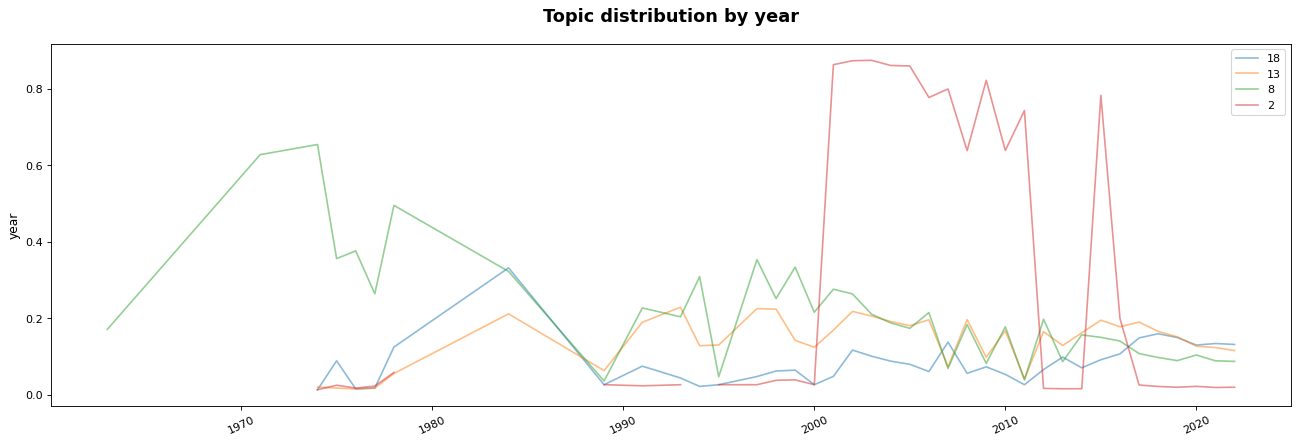

In [ ]:
Model_Topics = 19  ### SELECCIONE MODELO: COLOQUE NRO DE TOPICS: 19, 32 O 16

topics_dis_agg = pd.DataFrame()
if Model_Topics == 19:
  topics_dis_agg = topics_dis_agg1
elif:
  if Model_Topics == 32:
    topics_dis_agg = topics_dis_agg2
  elif:
    if Model_Topics == 16:
      topics_dis_agg = topics_dis_agg3
    elif:
      print("ERROR: No Disponible Modelo con ese Nro. de Topics. ELIJA ENTRE LOS DISPONIBLES: 19, 32 o ???") 


topics2viz = [18, 13, 8, 2]
viz_all = False

fig = plt.figure(figsize=(20, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)

plt.ylabel("year", fontsize=11)
plt.xticks(rotation=25)  # Rotates X-Axis Ticks by 45-degrees
# plt.xlabel('Days')

# displaying the title
plt.title(
    "Topic distribution by year", fontsize=16, fontweight="bold", pad=20
)


if viz_all == True:
  for i in topics_dis_agg.topic.unique():
      ax.plot(
          topics_dis_agg[topics_dis_agg["topic"] == i]["year"],
          topics_dis_agg[topics_dis_agg["topic"] == i]["prob", "median"],
          label=(i),
          # color="green",
          # color="#e41a1c",
          alpha=0.5,)
else: 
   for i in topics2viz:
      ax.plot(
          topics_dis_agg[topics_dis_agg["topic"] == i]["year"],
          topics_dis_agg[topics_dis_agg["topic"] == i]["prob", "median"],
          label=(i),
          # color="green",
          # color="#e41a1c",
          alpha=0.5,)


ax.legend()
plt.show()

In [ ]:
topics_dis_agg.to_csv('topic_distribution_year.csv', index = False)
files.download('/content/topic_distribution_year.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualizacion de distribucion de topicos

In [ ]:
### GRAFICO DE TOPICOS DEL MODELO:
pyLDAvis.gensim.prepare(ldamodel_optimo, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.206856  0.068989       1        1  20.068320
13    -0.184161  0.050953       2        1  12.111227
9     -0.138949  0.082048       3        1  10.611284
8     -0.134225  0.003875       4        1   8.812806
5     -0.186684  0.109770       5        1   8.223380
2      0.362844  0.247323       6        1   7.536012
18    -0.161440  0.072927       7        1   7.209816
17    -0.113271  0.102331       8        1   4.387667
4     -0.093600 -0.000228       9        1   3.826021
7     -0.119262  0.024523      10        1   3.751445
3     -0.024229 -0.107821      11        1   2.481728
6     -0.038201 -0.061046      12        1   2.153106
10    -0.019580 -0.109647      13        1   2.128405
15     0.355844  0.252074      14        1   2.016045
11     0.028475 -0.093739      15        1   1.907265
1      0.052269 -0.185992      16        1   1.749866
0      0.193013 -0.196002      17        1   0.369397
16     0.236307 -0.091147      18        1   0.355887
12     0.191705 -0.169190      19        1   0.300327, topic_info=             Term          Freq         Total Category  logprob  loglift
279            de   9968.000000   9968.000000  Default  30.0000  30.0000
286            et   4200.000000   4200.000000  Default  29.0000  29.0000
354         model  11347.000000  11347.000000  Default  28.0000  28.0000
72    translation   6653.000000   6653.000000  Default  27.0000  27.0000
1296       models  10545.000000  10545.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
4979         axes     27.082151     28.098659  Topic19  -5.0441   5.7712
3770      augment    194.108508    225.778826  Topic19  -3.0746   5.6569
4458      adapter     62.974068     73.598170  Topic19  -4.2003   5.6522
2781     messages    157.936017    215.374388  Topic19  -3.2808   5.4979
4201           av     49.077167     71.772933  Topic19  -4.4496   5.4279

[1109 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6415      8  0.991402  ablation
7722      8  0.986608      absa
144       2  0.051916  abstract
144       7  0.057684  abstract
144      10  0.092295  abstract
...     ...       ...       ...
1563      8  0.021269     years
1563     11  0.001519     years
1563     12  0.006077     years
5710     18  0.962451      york
3834      2  0.990713      zero

[2413 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 14, 10, 9, 6, 3, 19, 18, 5, 8, 4, 7, 11, 16, 12, 2, 1, 17, 13])

lambda 
* cercano a 1 muestra las palabras mas probables de cada topico
* cercano a 0 muestra las palabras mas especificas de cada topico (palabras raras, altamente probables en ese topico y poco probables en los otros). Son palabras muy asociados al topico y son palabras poco probables. Serian palabras diferencialmente mas probables para del topico (pueden ser palabras poco proablbes para el topico pq son poco proablabes en si)´


el grafico de la izquierda muestra los topicos distribuidos espacialmente segun si tienen palabras parecidas